In [36]:
#create a data frame with student name and the marks in 5 subjects with roll no
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
# Create a DataFrame with student data
data={"Roll_no":[1,2,3,4,5,6,7],
      "student_name":["siddhesh","atharv","snehal","tanvi","aniket","priya","prerna"],
      "math_score":[80,90,85,65,95,75,95],
      "english_score":[98,80,60,75,75,85,85],
     "science_score":[85,85,80,75,62,80,90],
    "hindi_score":[85,95,80,75,90,85,85],
     "marathi_score":[98,85,90,75,90,92,85]}
      
df_student=pd.DataFrame(data)


# data cleaning and data preprocessssing

In [37]:
#set index
df_student.set_index('Roll_no',inplace=True)
# Calculate total marks and percentage
df_student['Total_marks']=df_student[['math_score','english_score','science_score','hindi_score','marathi_score']].sum(axis=1)
df_student['Percentage(%)']=(df_student['Total_marks']/500)*100 
# if any null value exist replace it with 0
df_student.fillna(0, inplace=True)

In [38]:
#capitalize the names
df_student['student_name']=df_student['student_name'].str.capitalize()
df_student

,student_name,math_score,english_score,science_score,hindi_score,marathi_score,Total_marks,Percentage(%)
Roll_no,,,,,,,,
1,Siddhesh,80,98,85,85,98,446,89.2
2,Atharv,90,80,85,95,85,435,87.0
3,Snehal,85,60,80,80,90,395,79.0
4,Tanvi,65,75,75,75,75,365,73.0
5,Aniket,95,75,62,90,90,412,82.4
6,Priya,75,85,80,85,92,417,83.4
7,Prerna,95,85,90,85,85,440,88.0


In [39]:
# Define a function to color grades
def color_grades(val): #grades color according to the condition
    if val >= 90:
        return 'background-color:green'
    elif 70 <= val < 90 :
        return 'background-color:orange'
    elif 50 <=val < 70:
        return 'background-color:red'
    else:
        return ''

In [40]:
# Apply color grades to scores
style_df=df_student.style.applymap(color_grades,subset=['math_score','english_score','science_score','hindi_score','marathi_score'])
style_df

,student_name,math_score,english_score,science_score,hindi_score,marathi_score,Total_marks,Percentage(%)
Roll_no,,,,,,,,
1,Siddhesh,80,98,85,85,98,446,89.200000
2,Atharv,90,80,85,95,85,435,87.000000
3,Snehal,85,60,80,80,90,395,79.000000
4,Tanvi,65,75,75,75,75,365,73.000000
5,Aniket,95,75,62,90,90,412,82.400000
6,Priya,75,85,80,85,92,417,83.400000
7,Prerna,95,85,90,85,85,440,88.000000


# Data Analysis

In [41]:

# Calculate mean and standard deviation of scores
df_student_mean=df_student[['math_score','english_score','science_score','hindi_score','marathi_score']].mean(axis=1)
# calculate the standard deviation
df_student_std=df_student[['math_score','english_score','science_score','hindi_score','marathi_score']].std(axis=1)


In [42]:
#cacluate the ranks on percentage and sort the values by rank in asceding order 
df_student['Ranks']=df_student['Percentage(%)'].rank(method='dense',ascending=False).astype(int)
df_student=df_student.sort_values(by='Ranks',ascending=True)


In [43]:
# funtion to color the top three rank in the table
def colored(val):
    if df_student['Ranks'][df_student['student_name'] == val].values[0] == 1:
    #if val in df_student['Ranks']==1:
        return 'background-color:darkgreen'
    elif df_student['Ranks'][df_student['student_name'] == val].values[0] == 2:
        return 'background-color:orange'
    elif df_student['Ranks'][df_student['student_name'] == val].values[0] == 3:
        return 'background-color:red'

In [44]:
styled_df=df_student.style.applymap(colored,subset=['student_name'])

# Data visualizations

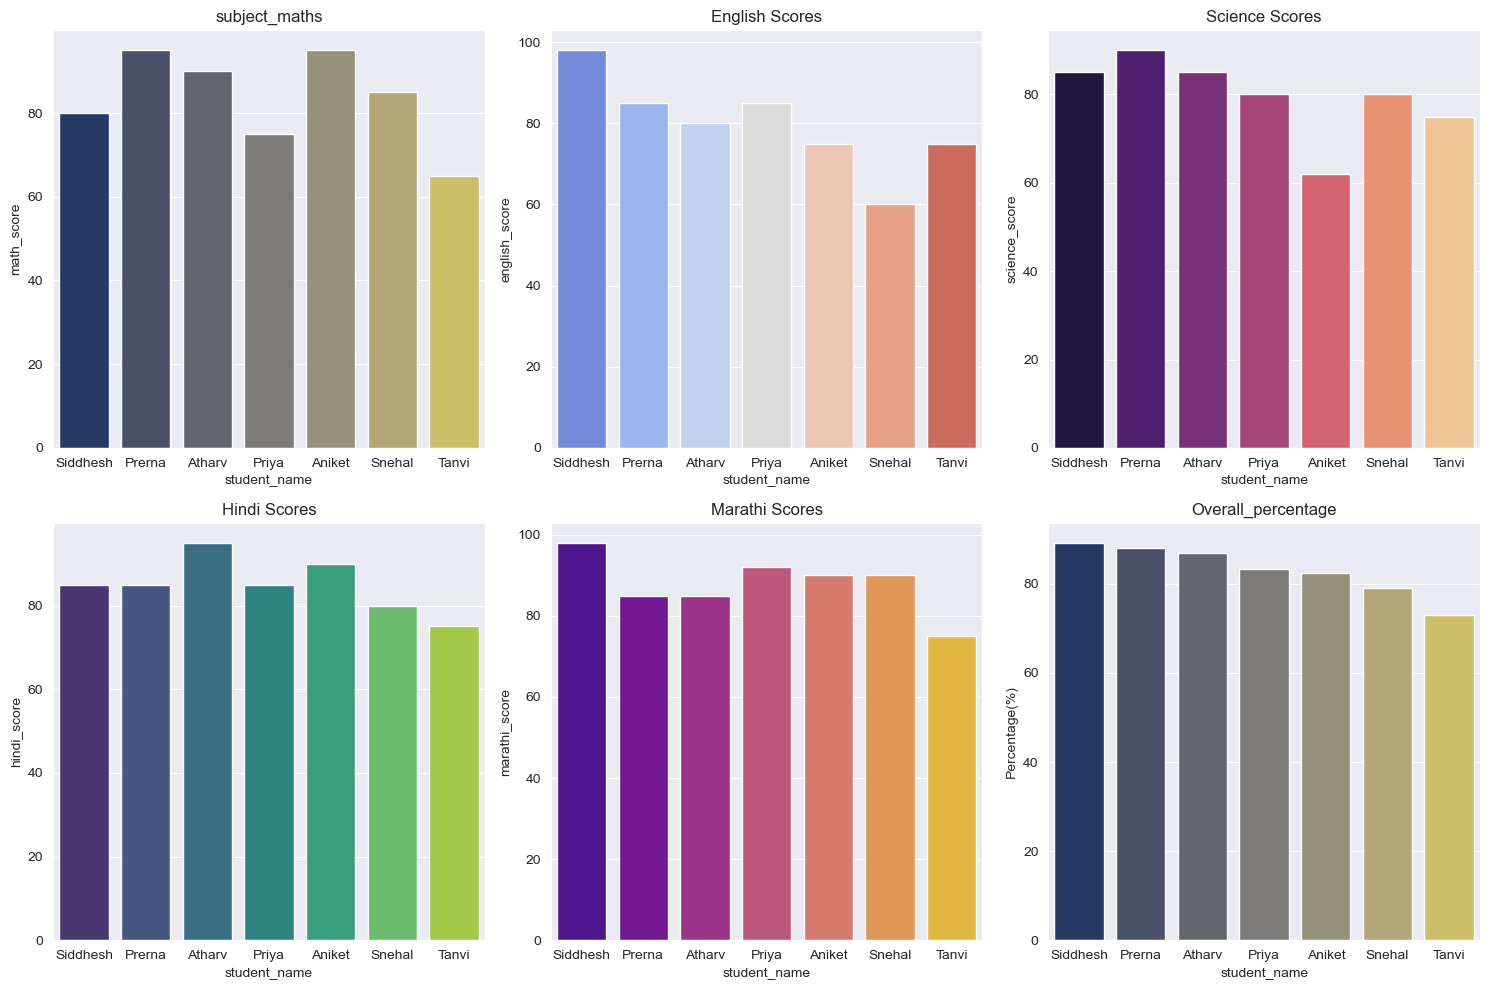

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
maths_bar_plot=sns.barplot(x='student_name',y='math_score',data=df_student,palette='cividis',ax=axs[0,0])
sns.set_style('whitegrid')
axs[0,0].set_title("subject_maths")


maths_bar_plot=sns.barplot(x='student_name',y='english_score',data=df_student,palette='coolwarm',ax=axs[0,1])
sns.set_style('darkgrid')
axs[0, 1].set_title("English Scores")

maths_bar_plot=sns.barplot(x='student_name',y='science_score',data=df_student,palette='magma',ax=axs[0,2])
sns.set_style('darkgrid')
axs[0, 2].set_title("Science Scores")


maths_bar_plot=sns.barplot(x='student_name',y='hindi_score',data=df_student,palette='viridis',ax=axs[1,0])
sns.set_style('darkgrid')
axs[1, 0].set_title("Hindi Scores")



maths_bar_plot=sns.barplot(x='student_name',y='marathi_score',data=df_student,palette='plasma',ax=axs[1,1])
sns.set_style('darkgrid')
axs[1, 1].set_title("Marathi Scores")

percent_plot=sns.barplot(x='student_name',y='Percentage(%)',data=df_student,palette='cividis',ax=axs[1,2])
sns.set_style('darkgrid')
axs[1,2].set_title("Overall_percentage")


plt.tight_layout()
plt.show()



In [46]:
# Generate HTML report
# Get the current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
fig.savefig('student_plots.png') # save the image as studentplot
with open('student_reports.html', 'w') as f:
    f.write(styled_df.to_html())
    f.write('<img src="student_plots.png" />')
    f.write(f'<p>Report generated on: {current_datetime}</p>')